# KMEANS: CUSTOMER SEGMENTATION USING ELBOW METHOD

### IMport Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Assign the last two column as x

In [4]:
x=df.iloc[:,[3,4]].values

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### KMEANS MODEL

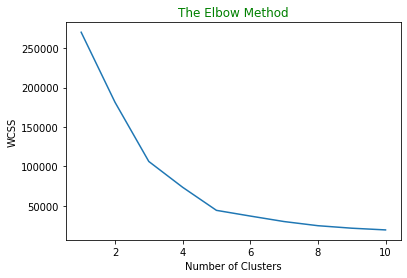

In [6]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method', c='g')
plt.show()

In [7]:
print(wcss)

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21850.165282585636, 19672.07284901432]


In [10]:
km=KMeans(n_clusters=5, init='k-means++', random_state=42)
y_pred=km.fit_predict(x)

In [11]:
print(y_pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


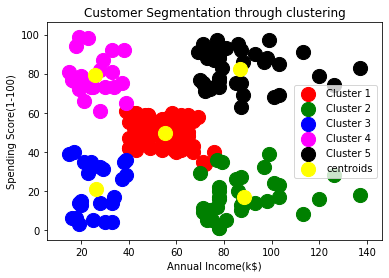

In [21]:
plt.scatter(x[y_pred==0,0], x[y_pred==0,1],s=200, c='red', label='Cluster 1')
plt.scatter(x[y_pred==1,0], x[y_pred==1,1],s=200, c='green', label='Cluster 2')
plt.scatter(x[y_pred==2,0], x[y_pred==2,1],s=200, c='blue', label='Cluster 3')
plt.scatter(x[y_pred==3,0], x[y_pred==3,1],s=200, c='magenta', label='Cluster 4')
plt.scatter(x[y_pred==4,0], x[y_pred==4,1],s=200, c='black', label='Cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=200, c='yellow', label='centroids')
plt.title('Customer Segmentation through clustering')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()